In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from matplotlib import gridspec
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    'malaria',
    split=['train[:90%]', 'train[90%:100%]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


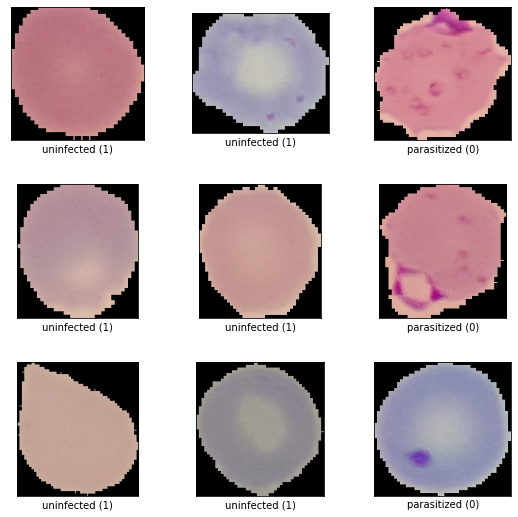

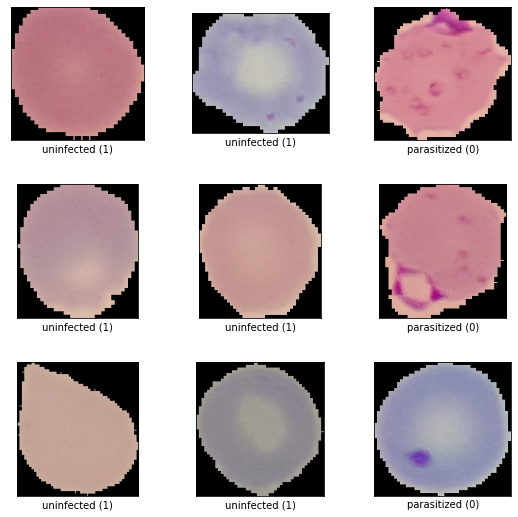

In [ ]:
tfds.show_examples(ds_train, ds_info)

In [ ]:
def normalize_img(image, label):
  image = tf.image.resize(image, (128, 128))
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train[:90%]'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
model = keras.Sequential([
    layers.InputLayer(input_shape=[128, 128, 3]),
    
    # Data Augmentation
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.10),
    # Block One
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Two
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.BatchNormalization(renorm=True),
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

Epoch 1/10
194/194 [==============================] - 68s 215ms/step - loss: 0.6739 - binary_accuracy: 0.5776 - val_loss: 0.5387 - val_binary_accuracy: 0.8215
Epoch 2/10
194/194 [==============================] - 36s 186ms/step - loss: 0.5084 - binary_accuracy: 0.8360 - val_loss: 0.3601 - val_binary_accuracy: 0.9093
Epoch 3/10
194/194 [==============================] - 36s 186ms/step - loss: 0.3560 - binary_accuracy: 0.9050 - val_loss: 0.2936 - val_binary_accuracy: 0.9278
Epoch 4/10
194/194 [==============================] - 36s 185ms/step - loss: 0.2574 - binary_accuracy: 0.9244 - val_loss: 0.2478 - val_binary_accuracy: 0.9325
Epoch 5/10
194/194 [==============================] - 36s 185ms/step - loss: 0.3231 - binary_accuracy: 0.8663 - val_loss: 0.2070 - val_binary_accuracy: 0.9434
Epoch 6/10
194/194 [==============================] - 36s 185ms/step - loss: 0.1901 - binary_accuracy: 0.9397 - val_loss: 0.2016 - val_binary_accuracy: 0.9503
Epoch 7/10
194/194 [==========================

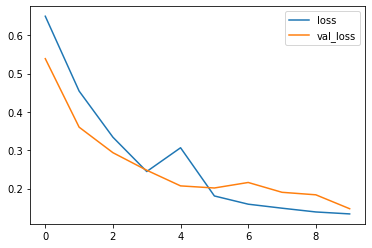

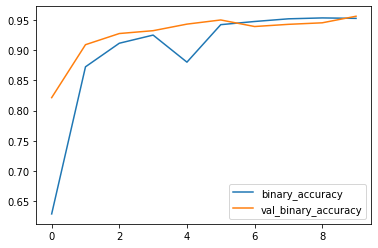

In [ ]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=10,
)

# Plot learning curves
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [27]:
model.save('model1')

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets
